<a href="https://colab.research.google.com/github/rmfpdlxmtidl/MachineLearningAssignments/blob/master/Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

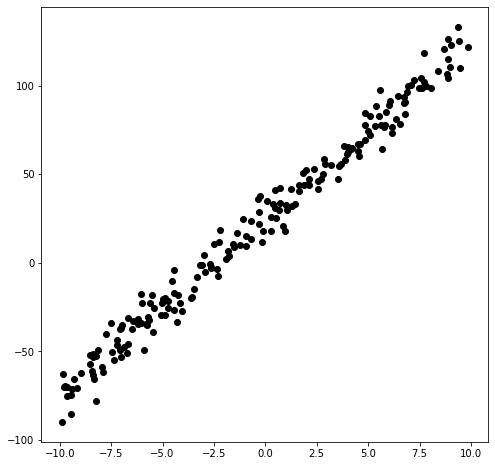

In [19]:
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color='black')

plt.show()


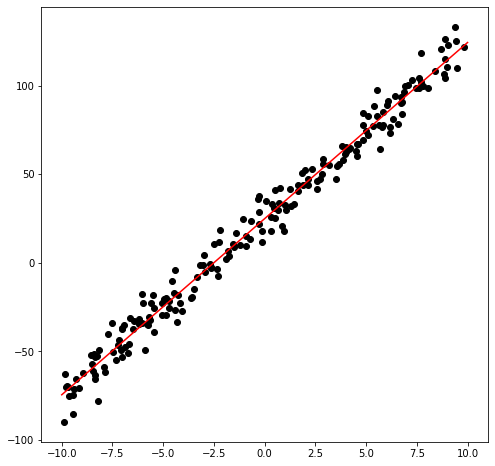

9.93463557764354 24.907395789137993


In [102]:
import numpy as np
import matplotlib.pyplot as plt
import math

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

w1 = 5000
w2 = 1000
alpha = 0.01

while(1):
  dj_dw1 = 0;
  dj_dw2 = 0;
  for xi, yi in zip(x_data, y_data):
    dj_dw1 += (w1 * xi + w2 - yi) * xi
    dj_dw2 += w1 * xi + w2 - yi

  next_w1 = w1 - alpha * (1/len(x_data)) * dj_dw1
  next_w2 = w2 - alpha * (1/len(x_data)) * dj_dw2

  if(math.isclose(next_w1, w1) and math.isclose(next_w2, w2)):
    break

  w1 = next_w1
  w2 = next_w2

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color='black')
plt.plot([-10, 10], [-10 * w1 + w2, 10 * w1 + w2], color='red')
plt.show()
print(w1, w2)

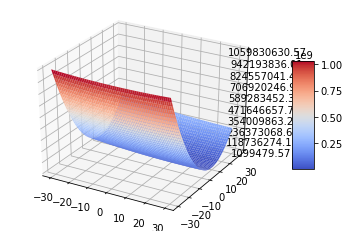

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import numpy as np
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Objective Function
def J(theta1, theta0):
  sigma = 0
  for xi, yi in zip(x_data, y_data):
    sigma += (theta1 + theta0 * xi - yi) ** 2
  return (1/2*len(x_data)) * sigma

# 1. Input points [2pt]
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

# 3. Plot the energy surface [4pt]
fig = plt.figure()
ax = fig.gca(projection='3d')

W1 = np.arange(-30, 30, 0.1)
W2 = np.arange(-30, 30, 0.1)
W1, W2 = np.meshgrid(W1, W2)
surf = ax.plot_surface(W1, W2, J(W1, W2), rstride=10, cstride=10, cmap=cm.coolwarm, linewidth=0)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()